In [2]:
import numpy as np
import pandas as pd

import string
import random
import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from tqdm.notebook import tqdm

In [3]:
!pip install tslearn >> None

# Анализируем car_info

(4250, 10)


,car_type,fuel_type,car_rating,year_to_start,riders,car_id,model,target_2,year_to_work,target_1
3212,standart,petrol,22.5,2013,23466,u-2034566q,Renault Sandero,engine_overheat,2014,7.584265e+05
4054,economy,petrol,26.3,2015,13691,M-1752971h,Hyundai Solaris,engine_check,2015,3.863226e+06
1910,economy,petrol,18.5,2014,7050,K20105985V,Hyundai Solaris,engine_fuel,2014,7.132663e+05
3290,standart,petrol,25.6,2015,35774,t-9895295r,Nissan Qashqai,engine_overheat,2016,9.279915e+05
2870,economy,petrol,25.3,2015,21285,X83711958h,Kia Rio X,engine_ignition,2021,1.361013e+07


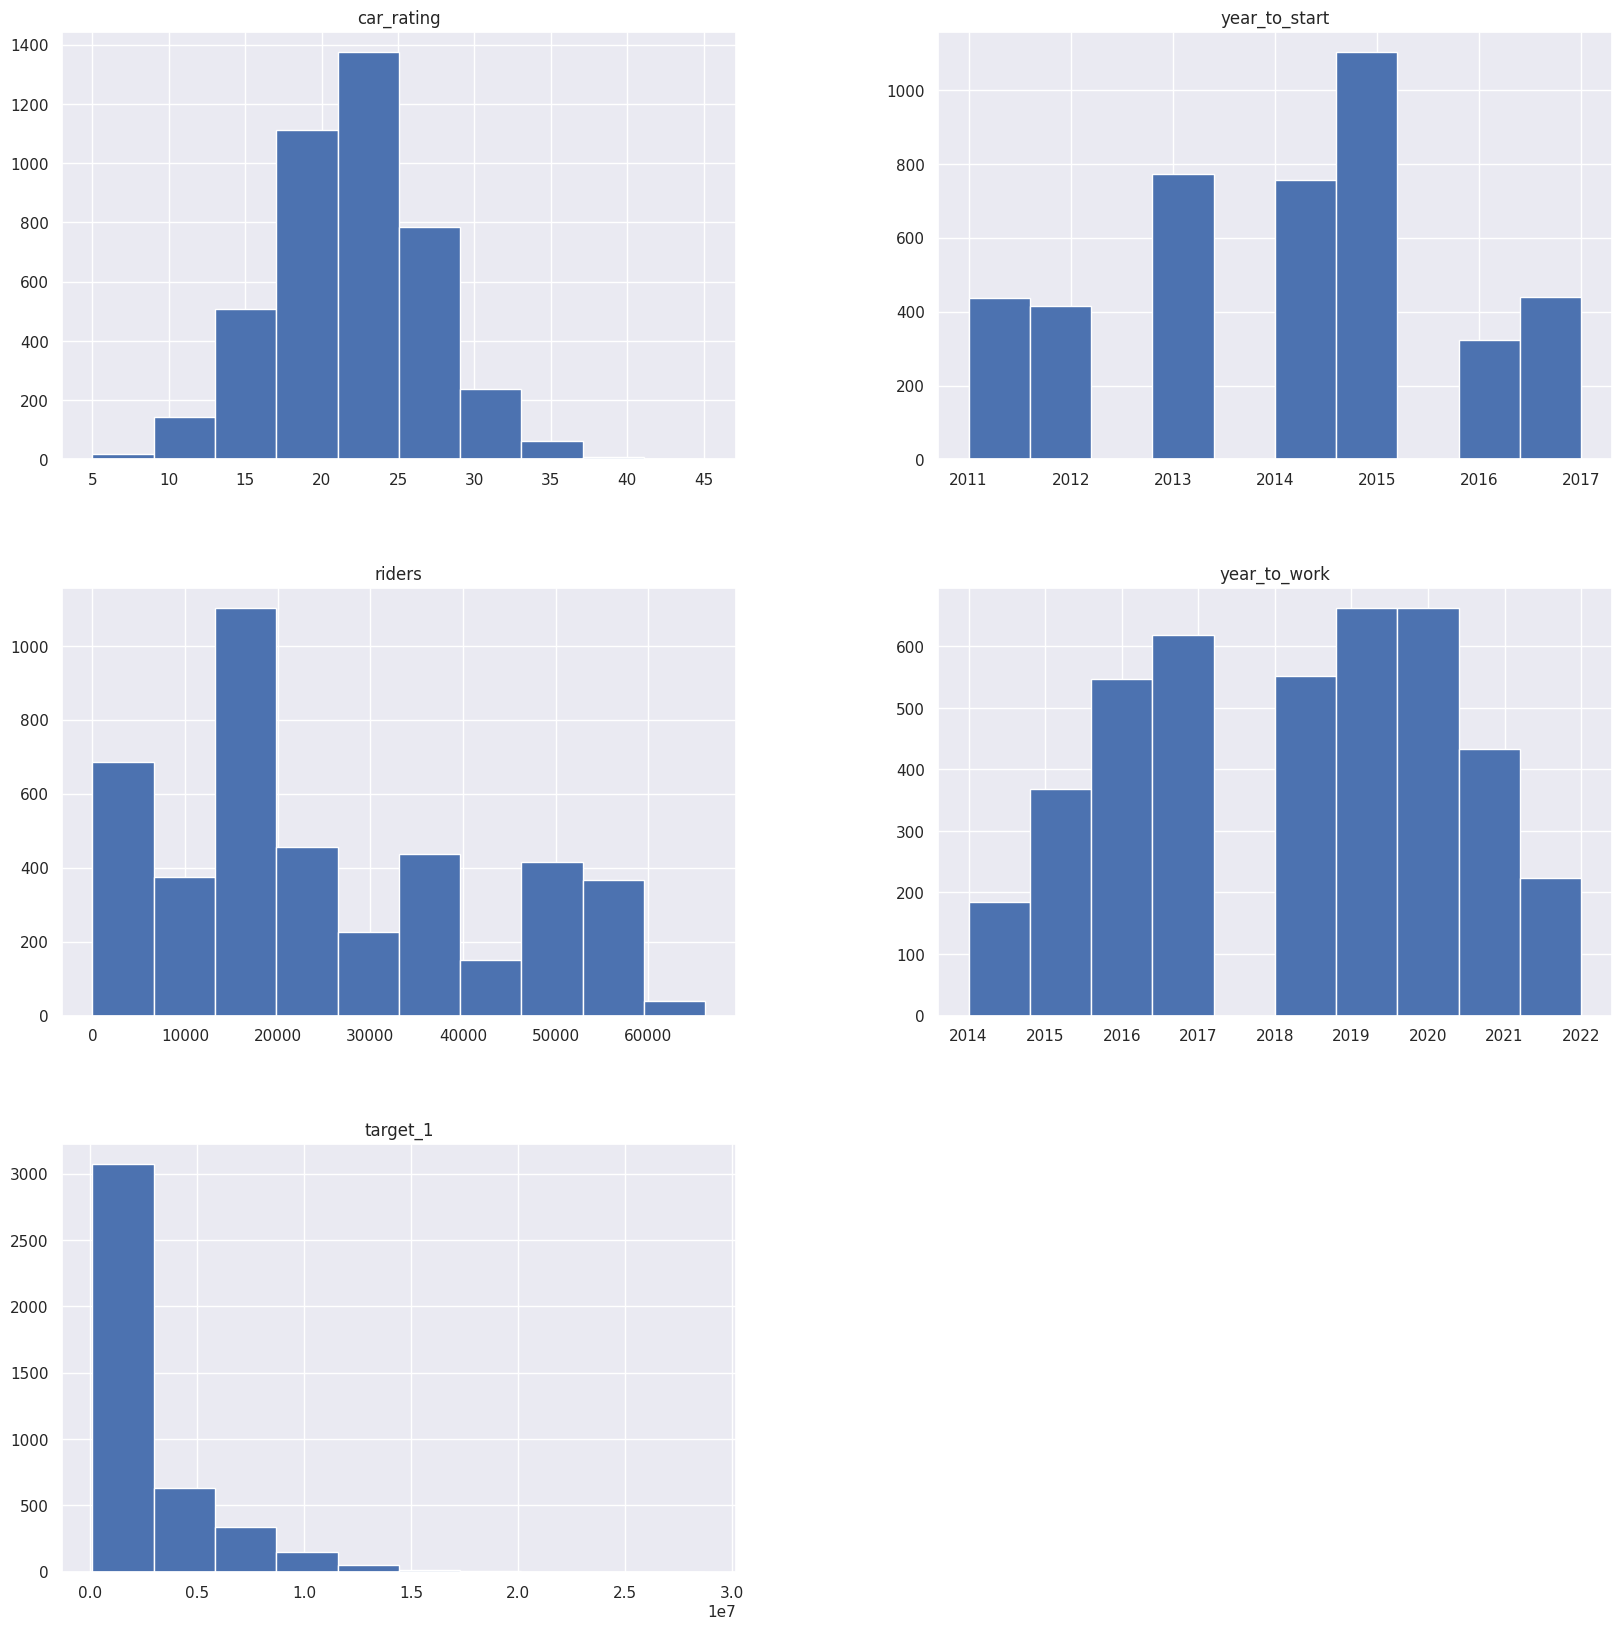

In [5]:
car_info = pd.read_csv('../data/car_info.csv')
print(car_info.shape)
car_info.hist(figsize=(20, 20))
car_info.sample(5)

# Анализируем driver_info

In [5]:
rider_info = pd.read_csv('../data/driver_info.csv').drop('sex', axis=1)
rider_info.sample(5)

,age,user_rating,user_rides,user_time_accident,user_id,first_ride_date
4601,37,7.7,242,8.0,Q11837632p,2020-4-15
3253,34,8.2,1215,1.0,z20244759P,2020-12-27
5099,25,9.1,1100,14.0,K21231527g,2018-11-4
12074,43,7.9,898,2.0,s11366825I,2019-3-21
11443,38,7.5,745,5.0,Q12530233e,2020-8-25


# Анализируем fix_info

(146000, 7)


,work_type,destroy_degree,work_duration,car_id,worker_id,sex,fix_date
38490,reparking,0.0,14,h16405062I,GB,1,2020-3-3 11:26
13473,reparking,0.0,14,q15203256I,FN,0,2021-3-27 11:47
9783,reparking,0.0,15,c20090185F,CT,1,2019-9-9 13:14
30926,reparking,0.0,17,G53310183l,US,1,2020-4-18 14:22
95587,reparking,0.0,10,k28887049x,LK,0,2019-9-17 8:55


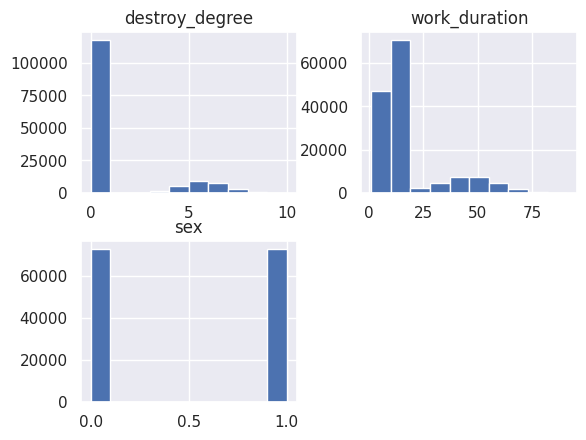

In [10]:
fix_info = pd.read_csv('../data/fix_info.csv')
print(fix_info.shape)
fix_info.hist()
fix_info.sample(5)

# Информация rides_info

In [ ]:
rides_info = pd.read_csv('../data/rides_info.csv')
print(rides_info.shape)
rides_info.hist(figsize=(20, 20))
rides_info.sample(5)

(739500, 14)


,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
632399,G12430401D,s-4497192r,k1V,2020-02-14,4.18,37,326,65,108.769929,6,748.674267,0,7.290174,-58.196
631907,C16478499X,s-4207108I,r1k,2020-02-29,3.63,50,447,32,61.000000,0,1641.921531,0,-5.939452,43.082
79239,K16676378F,F14220851c,I1Y,2020-02-06,7.42,11,138,64,77.960669,0,625.328929,0,10.629209,53.769
96642,r39518909n,G86360617b,v1e,2020-02-08,3.83,88,1138,48,84.903540,2,4298.761883,0,-19.687279,-33.539
453753,e17695703A,f18622639s,a1f,2020-03-12,3.79,19,259,43,96.000000,1,362.539773,0,-10.314589,4.975


# Соберем таргет

In [5]:
rides_info = pd.read_csv('../data/rides_info.csv').drop(['car_rating'], axis=1)
car_info = pd.read_csv('../data/car_info.csv')[['car_id','target_1', 'target_2']]
rides_info = rides_info.merge(car_info, on = 'car_id', how = 'left')
rides_info.head()                                          

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,target_1,target_2
0,O99128811L,A-1033131b,a1m,2020-01-01,4.32,33.606468,297,37.000000,41.000000,1,0.286812,0,0.364733,0.252,1.712333e+07,engine_ignition
1,H70665909D,A-1033131b,b1n,2020-01-01,5.65,92.160352,1193,21.000000,37.000000,2,0.900576,0,0.240391,0.127,1.712333e+07,engine_ignition
2,b21653869m,A-1033131b,D1A,2020-01-02,4.59,29.491600,260,38.642341,42.642341,1,0.424380,0,1.352441,0.441,1.712333e+07,engine_ignition
3,A20633361j,A-1033131b,O1K,2020-01-02,4.37,59.954135,654,25.167607,57.000000,0,0.337006,0,1.174927,-0.355,1.712333e+07,engine_ignition
4,u29506811f,A-1033131b,E1U,2020-01-03,4.63,132.367438,1715,38.230802,47.000000,1,1.062512,0,1.866979,-0.424,1.712333e+07,engine_ignition
